In [1]:
import os # operaation system control  
import zipfile 

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [2]:
base_dir = 'cats_and_dogs_filtered' # file name 

train_dir = os.path.join(base_dir, 'train') # training file subset 
validation_dir = os.path.join(base_dir, 'validation') # Validation file subset 

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

In [5]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

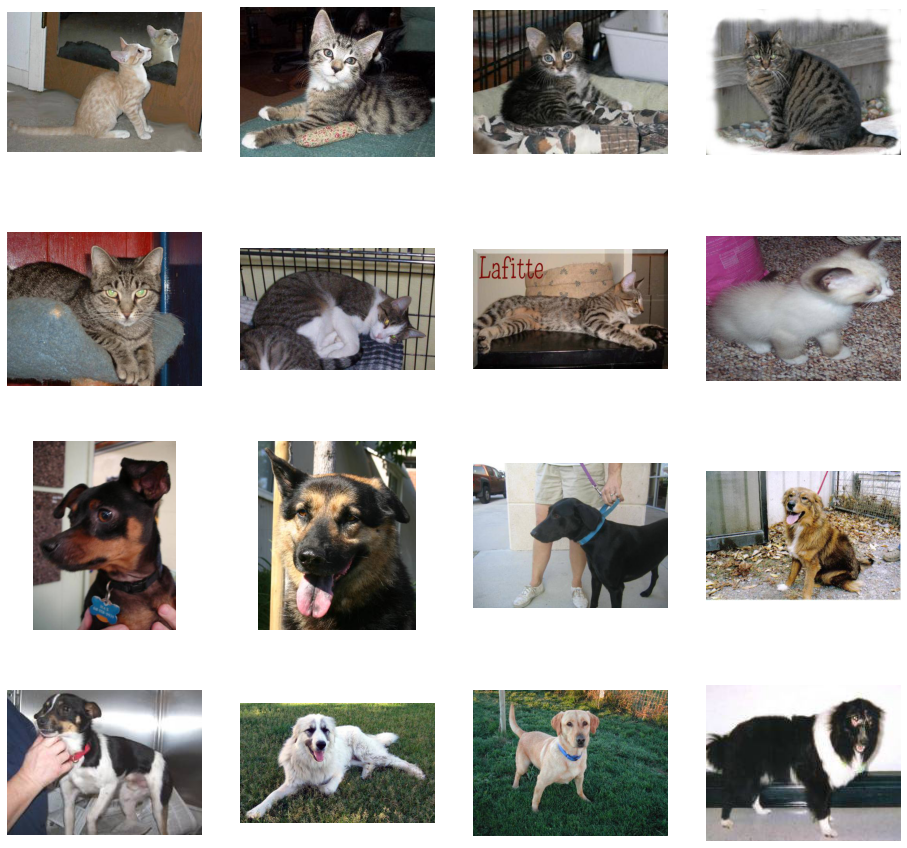

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
import tensorflow as tf

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [9]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 and traing data will be augmentated using imagegenerator
train_datagen = ImageDataGenerator( 
      rescale = 1.0/255, # rescale image size 
      rotation_range=40, # image can be rotated up to 40 degrees 
      width_shift_range=0.3, # image width can shift 30% 
      height_shift_range=0.3, # image height can shift 30% 
      shear_range=0.3, 
      zoom_range=0.25, # image can zoom in by 25%  
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen  = ImageDataGenerator(rescale = 1.0/255)

# Flow training images in batches of 25 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=25,
                                                    color_mode = 'rgb',
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

# Flow validation images in batches of 25 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=25,
                                                         color_mode = 'rgb',
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(train_generator,validation_data=validation_generator, epochs=50,verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
80/80 - 19s - loss: 0.6532 - accuracy: 0.6150 - val_loss: 0.6342 - val_accuracy: 0.6480 - 19s/epoch - 241ms/step
Epoch 2/50
80/80 - 19s - loss: 0.6491 - accuracy: 0.6380 - val_loss: 0.6269 - val_accuracy: 0.6180 - 19s/epoch - 242ms/step
Epoch 3/50
80/80 - 19s - loss: 0.6436 - accuracy: 0.6195 - val_loss: 0.6208 - val_accuracy: 0.6600 - 19s/epoch - 240ms/step
Epoch 4/50
80/80 - 19s - loss: 0.6410 - accuracy: 0.6210 - val_loss: 0.6269 - val_accuracy: 0.6230 - 19s/epoch - 238ms/step
Epoch 5/50
80/80 - 19s - loss: 0.6412 - accuracy: 0.6350 - val_loss: 0.6196 - val_accuracy: 0.6550 - 19s/epoch - 238ms/step
Epoch 6/50
80/80 - 19s - loss: 0.6327 - accuracy: 0.6320 - val_loss: 0.6124 - val_accuracy: 0.6660 - 19s/epoch - 239ms/step
Epoch 7/50
80/80 - 19s - loss: 0.6309 - accuracy: 0.6430 - val_loss: 0.5953 - val_accuracy: 0.6790 - 19s/epoch - 238ms/step
Epoch 8/50
80/80 - 19s - loss: 0.6273 - accuracy: 0.6485 - val_loss: 0.5864 - val_accuracy: 0.6920 - 19s/epoch - 239ms/step
Epoch 9/

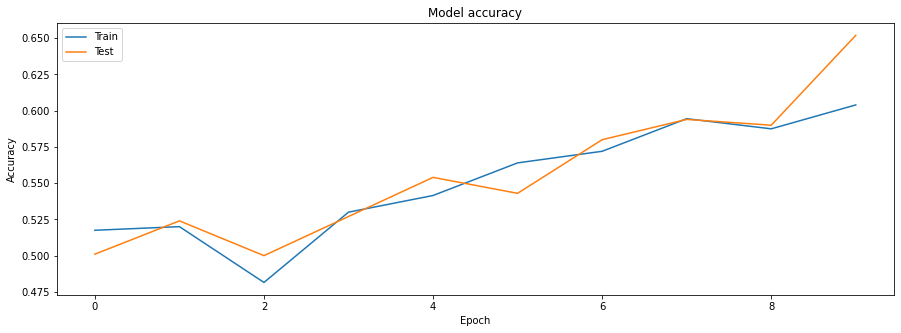

In [12]:
# graph model accuracy of training and testing subsets 
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

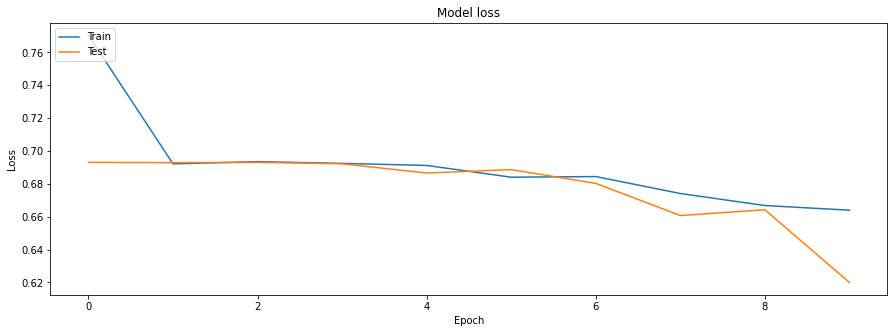

In [13]:
# graph the loss of both training and testing subsets 
plt.figure(figsize=(15,5))
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()